In [53]:
import pandas as pd
import numpy as np

df_titanic = pd.read_csv("titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [129]:
def describe_df(dataframe):
    dic_columnas = {}
    for columna in dataframe.columns:
        a = dataframe[columna].dtype
        b = round((len(dataframe.loc[dataframe[columna].isna()])/len(dataframe)*100),2)
        c = dataframe[columna].nunique()
        d = round(dataframe[columna].nunique()/len(dataframe)*100, 2)
        dic_columnas[columna] = [a, b, c, d]

    indice = ["DATA_TYPE", "MISSINGS (%)", "UNIQUE_VALUES", "CARDIN (%)"]
    df = pd.DataFrame(dic_columnas, index = indice)
    return df

In [ ]:
describe_df(df_titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
DATA_TYPE,int64,int64,object,float64,int64,int64,float64,object,object,object,bool,object,object,object,bool
MISSINGS (%),0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.22,0.0,0.0,0.0,77.22,0.22,0.0,0.0
UNIQUE_VALUES,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
CARDIN (%),0.22,0.34,0.22,9.88,0.79,0.79,27.83,0.34,0.34,0.34,0.22,0.79,0.34,0.22,0.22


In [ ]:
def tipifica_variables (df_in, umbral_categoria = 10, umbral_continua=20):
    diccion = {}
    for columna in df_in.columns:
      if df_in[columna].nunique() == 2:
        diccion[columna] = "Binaria"
      if df_in[columna].nunique() > 2 and df_in[columna].nunique() < umbral_categoria:
        diccion[columna] = "Categórica"
      if df_in[columna].nunique() >= umbral_categoria:
        diccion[columna] = "Numérica discreta"
      if (df_in[columna].nunique()/len(df_in[columna]) * 100) >= umbral_continua:
          diccion[columna] = "Numérica continua"
        
    categoria = pd.Series(diccion)
    df = pd.DataFrame(categoria)
    
    return df.rename(columns={0:"Categoria"})

In [ ]:
tipifica_variables(df_titanic)


,Categoria
survived,Binaria
pclass,Categórica
sex,Binaria
age,Numérica discreta
sibsp,Categórica
parch,Categórica
fare,Numérica continua
embarked,Categórica
class,Categórica
who,Categórica


In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
def get_features_num_regression(dataframe, target_col,umbral_corr, pvalue = None):
    try: 
        lista_columnas = []
        tabla = dataframe.drop(target_col, axis=1)
        for col in tabla.columns:
            if tabla[col].dtype != 'object':
                corrs = pearsonr(dataframe[target_col], dataframe[col])
                if pvalue != None:
                    if np.abs(corrs[0]) > umbral_corr and corrs[1] <= pvalue:
                        lista_columnas.append(col)
                else:
                    if np.abs(corrs[0]) > umbral_corr:
                        lista_columnas.append(col)
    
        lista_columnas.insert(0, target_col)
        corr_matrix = dataframe[lista_columnas].corr()
        figura = plt.figure(figsize=(10,10))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"
        plt.title('Matriz de Correlación')
        plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
        plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario
        lista_columnas.remove(target_col)

        return lista_columnas, figura

    except KeyError: 
        print(f"¡Lo siento, la columna '{target_col}' no existe! Revisa que esté bien escrita")
        
      
    
        

(['pclass', 'fare', 'adult_male', 'alone'],
 <Figure size 1000x1000 with 2 Axes>)

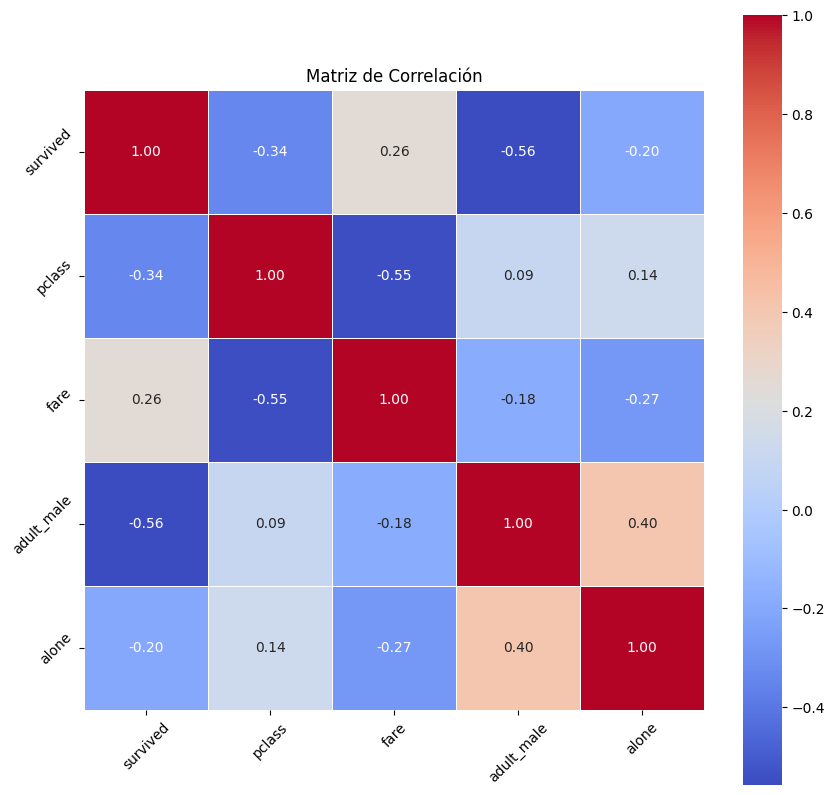

In [64]:
get_features_num_regression(df_titanic, "survived", 0.2)

In [3]:
df_tit = pd.read_csv("titanic_modified.csv")
df_tit

,Survived,Pclass,Sex,Age,SibSp,Parch,MissingAge,Spouse
0,0,3,1,22.00,1,0,0,1
1,1,1,0,38.00,1,0,0,1
2,1,3,0,26.00,0,0,0,0
3,1,1,0,35.00,1,0,0,1
4,0,3,1,35.00,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,0,0
887,1,1,0,19.00,0,0,0,0
888,0,3,0,21.75,1,2,1,1
889,1,1,1,26.00,0,0,0,0


['Pclass', 'Sex', 'Spouse']

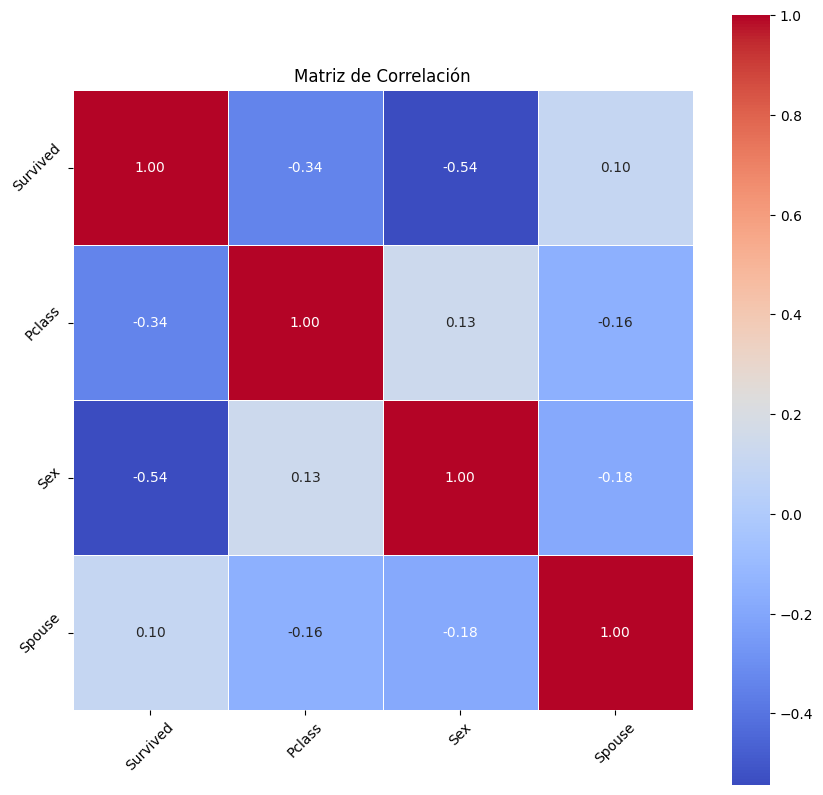

In [35]:
get_features_num_regression(df_tit, "Survived", 0.1, 0.02)

In [29]:
for col in df_tit.columns:
    print(col, pearsonr(df_tit['Survived'], df_tit[col]))

Survived PearsonRResult(statistic=np.float64(0.9999999999999998), pvalue=np.float64(0.0))
Pclass PearsonRResult(statistic=np.float64(-0.3384810359610153), pvalue=np.float64(2.5370473879815314e-25))
Sex PearsonRResult(statistic=np.float64(-0.5433513806577552), pvalue=np.float64(1.406066130880109e-69))
Age PearsonRResult(statistic=np.float64(-0.06748497568533394), pvalue=np.float64(0.044023247530017594))
SibSp PearsonRResult(statistic=np.float64(-0.03532249888573556), pvalue=np.float64(0.29224392869829435))
Parch PearsonRResult(statistic=np.float64(0.08162940708348344), pvalue=np.float64(0.014799245374727977))
MissingAge PearsonRResult(statistic=np.float64(-0.09219652324217222), pvalue=np.float64(0.005886534840075625))
Spouse PearsonRResult(statistic=np.float64(0.10041581094139419), pvalue=np.float64(0.0026931221183001835))


In [51]:
def plot_features_num_regression(dataframe, target_col, lista = [], umbral_corr = 0, pvalue = None):
    lista_columnas = []
    if len(lista) == 0:
        tabla = dataframe.drop(target_col, axis=1)
        for col in tabla.columns:
            if tabla[col].dtype != 'object':
                corrs = pearsonr(dataframe[target_col], dataframe[col])
                if pvalue != None:
                    if np.abs(corrs[0]) > umbral_corr and corrs[1] <= pvalue:
                        lista_columnas.append(col)
                else:
                    if np.abs(corrs[0]) > umbral_corr:
                        lista_columnas.append(col)
        lista_columnas.insert(0, target_col)
        sns.pairplot(dataframe[lista_columnas])


    else:
        lista
        for col in lista:
            corrs = pearsonr(dataframe[target_col], dataframe[col])
            if pvalue != None:
                if np.abs(corrs[0]) < umbral_corr or corrs[1] > pvalue:
                    lista.remove(col)
            else:
                if np.abs(corrs[0]) < umbral_corr:
                    lista_columnas.remove(col)
        lista.insert(0, target_col)
        sns.pairplot(dataframe[lista])
    
    return
      

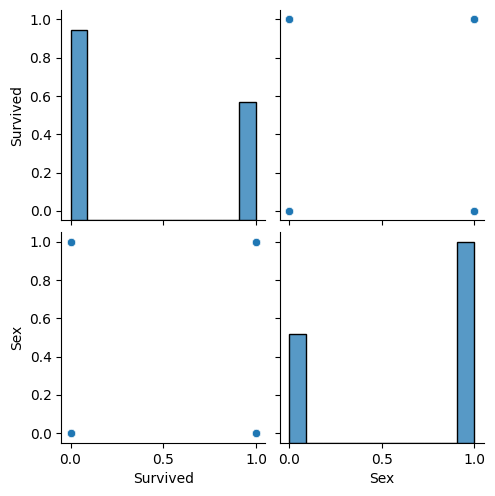

In [52]:
plot_features_num_regression(df_tit, "Survived", ["Pclass", "Sex"], 0.5, 0.02)

In [40]:
def pinta(dataframe):
    mapa = sns.pairplot(dataframe)
    return mapa 

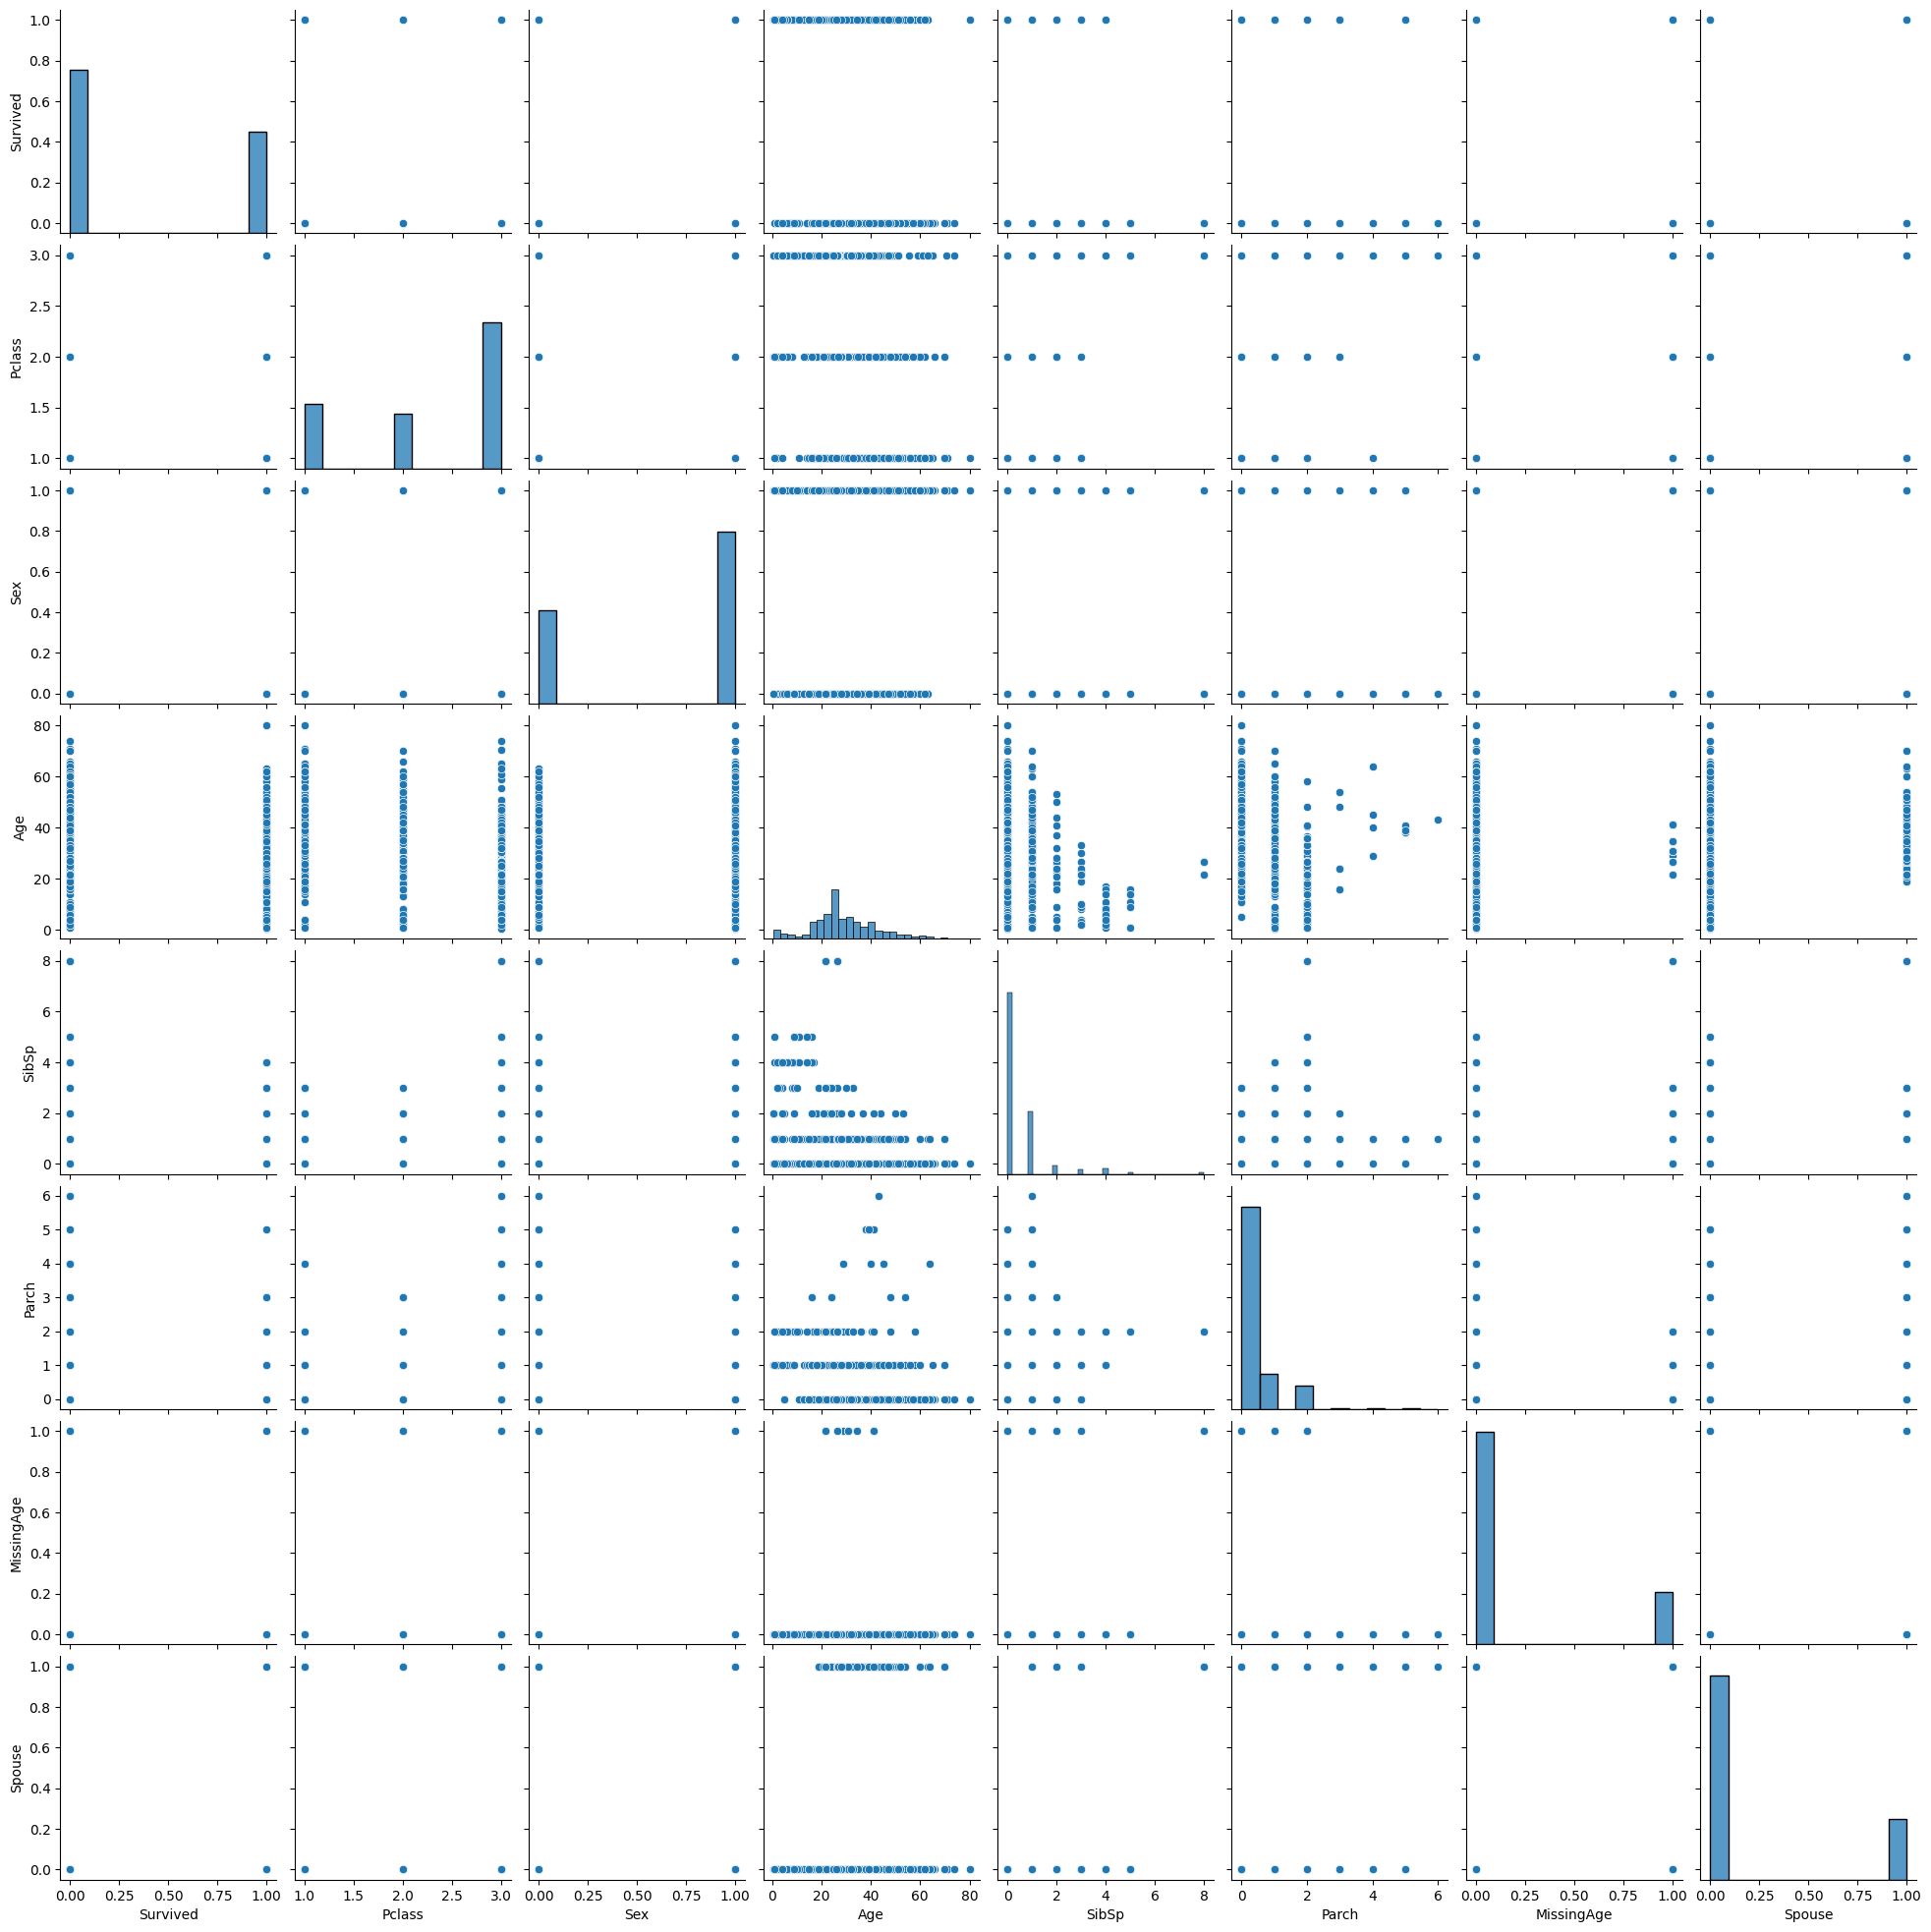

In [41]:
pinta(df_tit)